# Web Scraping and Analysis


This Jupyter Notebook is created for the British Airways Virtual Internship Task #1 (Web Scraping and Sentiment Analysis).

<h3>Scrape Data from Skytrax Using BeautifulSoup</h3>

Website URL: https://www.airlinequality.com/airline-reviews/british-airways
</br>Python Library : beautifulsoup4 4.12.2

pip install beautifulsoup4

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url= 'https://www.airlinequality.com/airline-reviews/british-airways'
page=350
review=[]
for i in range(1,page+1):
    getResponseURL= f"{url}/page/{i}"
    responseContent=requests.get(getResponseURL)
    
    content=responseContent.content
    parseContent=BeautifulSoup(content,'html.parser')
    for reviews in parseContent.find_all("div",class_="text_content"):
        review.append(reviews.get_text())
    

Now, the review list is going to have the set of all reviews. Now we clean it.

In [3]:
for i in range(0, len(review)):
    split=review[i].split("|")
    if len(split)==1:
        review[i]=split[0]
    else:
        review[i]=split[1]

Remove all Special Characters 

In [6]:
import re
def clean(text):
    text=re.sub('[^A-Za-z]+',' ',text)
    return text
for i in range(0,len(review)):
    review[i]=clean(review[i])

# VADER Sentiment Analysis

Using VADER to calculate the polarity of each review and mark it as 'positive' or 'negative' or 'neutral'.

In [10]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.3 MB/s eta 0:00:00


In [12]:
frame= pd.DataFrame()
frame['Review']=review
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_polarity(review):
  dict=analyzer.polarity_scores(review)
  score=dict['compound']
  if score>=0.3:
    return 'Positive'
  elif score<0:
    return 'Negative'
  else:
    return 'Neutral'
  
frame['Sentiment']=frame['Review'].apply(calculate_polarity)
frame.head()


,Review,Sentiment
0,The worst experience in all my years of trave...,Negative
1,A serious medical problem appeared while I wa...,Negative
2,I haven t flown British Airways before and wi...,Negative
3,My itinerary was supposed to be Las Vegas Chi...,Negative
4,Busy day at LHR and flight full Lounge crowde...,Positive


In [14]:
vader_counts = frame['Sentiment'].value_counts()
vader_counts

Positive    1912
Negative    1401
Neutral      187
Name: Sentiment, dtype: int64

# **Visualization**

([<matplotlib.patches.Wedge at 0x7f5e70adfdc0>,
 [Text(-0.15938877557396278, 1.0883911145452414, 'Positive'),
  Text(-0.02468202369973345, -1.099723055003434, 'Negative'),
  Text(1.084540683782821, -0.18377025118307633, 'Neutral')],
 [Text(-0.0869393321312524, 0.5936678806610407, '54.6%'),
  Text(-0.013462922018036427, -0.5998489390927821, '40.0%'),
  Text(0.5915676456997205, -0.10023831882713254, '5.3%')])

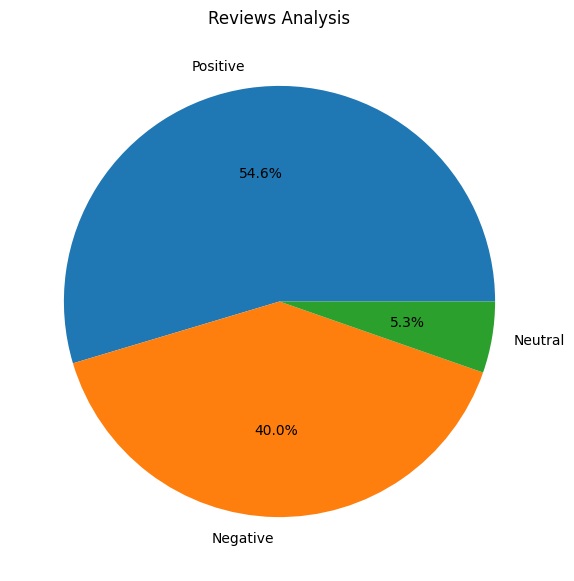

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index,  autopct='%1.1f%%')